In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
from fastcore.xtras import load_pickle

from scipy.stats import sem

import matplotx
import numpy as np
import pandas as pd

from gptchem.plotsettings import *

%matplotlib inline

In [3]:
all_res = glob("out/**/*.pkl")

In [4]:
load_pickle(all_res[0]).keys()

dict_keys(['representation', 'num_train_points', 'r2', 'max_error', 'mean_absolute_error', 'mean_squared_error', 'rmse', 'baseline'])

In [5]:
compiled_res = []
compiled_gpr = []
compiled_esol = []
compiled_weave = []
compiled_graph_conv = []
compiled_xgb = []

for res in all_res:
    try:
        loaded = load_pickle(res)
        repre = loaded["representation"]
        num_points = loaded["num_train_points"]

        metrics = {
            "representation": loaded["representation"],
            "num_train_points": loaded["num_train_points"],
            "mae": loaded["mean_absolute_error"],
            "max_error": loaded["max_error"],
            "mse": loaded["mean_squared_error"],
        }

        compiled_res.append(metrics)

        gpr_metrics = {
            "num_train_points": loaded["num_train_points"],
            "mae": loaded['baseline']["gpr"]["mean_absolute_error"],
            "max_error": loaded['baseline']["gpr"]["max_error"],
            "mse": loaded['baseline']["gpr"]["mean_squared_error"],
        }

        compiled_gpr.append(gpr_metrics)


        weave_metrics = {
            "num_train_points": loaded["num_train_points"],
            "mae": loaded['baseline']["weave"]["mean_absolute_error"],
            "max_error": loaded['baseline']["weave"]["max_error"],
            "mse": loaded['baseline']["weave"]["mean_squared_error"],
        }

        compiled_weave.append(weave_metrics)

        xgb_metrics = {
            "num_train_points": loaded["num_train_points"],
            "mae": loaded['baseline']["xgb"]["mean_absolute_error"],
            "max_error": loaded['baseline']["xgb"]["max_error"],
            "mse": loaded['baseline']["xgb"]["mean_squared_error"],
        }

        compiled_xgb.append(xgb_metrics)

        graph_conv_metrics =  {
            "num_train_points": loaded["num_train_points"],
            "mae": loaded['baseline']["graph_conv"]["mean_absolute_error"],
            "max_error": loaded['baseline']["graph_conv"]["max_error"],
            "mse": loaded['baseline']["graph_conv"]["mean_squared_error"],
        }

        compiled_graph_conv.append(graph_conv_metrics)

        graph_esol_metrics =  {
            "num_train_points": loaded["num_train_points"],
            "mae": loaded['baseline']["esol"]["mean_absolute_error"],
            "max_error": loaded['baseline']["esol"]["max_error"],
            "mse": loaded['baseline']["esol"]["mean_squared_error"],
        }

        compiled_esol.append(graph_esol_metrics)
    except Exception:
        pass


In [6]:
compiled_res = pd.DataFrame(compiled_res)
compiled_gpr = pd.DataFrame(compiled_gpr)
compiled_esol = pd.DataFrame(compiled_esol)
compiled_graph_conv = pd.DataFrame(compiled_graph_conv)
compiled_weave = pd.DataFrame(compiled_weave)
compiled_xgb = pd.DataFrame(compiled_xgb)

In [7]:
compiled_grouped_res = compiled_res.groupby(["representation", "num_train_points"]).agg(
    ["mean", "std", "count", sem]
)

In [8]:
compiled_gpr_grouped = compiled_gpr.groupby(["num_train_points"]).agg(["mean", "std", sem])
compiled_esol_grouped = compiled_esol.groupby(["num_train_points"]).agg(["mean", "std", sem])
compiled_graph_conv_grouped = compiled_graph_conv.groupby(["num_train_points"]).agg(["mean", "std", sem])
compiled_weave_grouped = compiled_weave.groupby(["num_train_points"]).agg(["mean", "std", sem])
compiled_xgb_grouped = compiled_xgb.groupby(["num_train_points"]).agg(["mean", "std", sem]) 

In [9]:
compiled_grouped_res

mae                           max_error  \
                                     mean       std count       sem      mean   
representation num_train_points                                                 
SMILES         10                1.251429  0.014264     3  0.008236  3.983333   

                                                              mse            \
                                      std count      sem     mean       std   
representation num_train_points                                               
SMILES         10                0.215484     3  0.12441  2.59003  0.068952   

                                                
                                count      sem  
representation num_train_points                 
SMILES         10                   3  0.03981

/Users/kevinmaikjablonka/git/kjappelbaum/plotutils/plotutils.py:11: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(x_min - pad * (x_max - x_min), x_max + pad * (x_max - x_min))


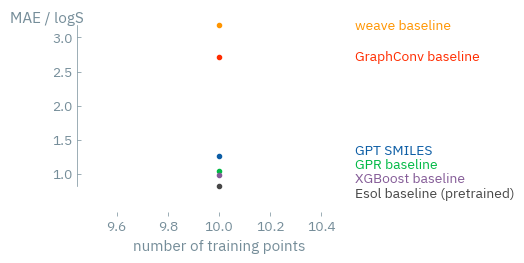

In [10]:
# with plt.style.context(matplotx.styles.dufte):
fig, ax = plt.subplots(1, 1)
# ax.plot(
#     compiled_grouped_res.loc["selfies", :].index,
#     compiled_grouped_res.loc["selfies", :]["mae"]["mean"],
#     label="GPT SELFIES",
#     marker="o",
# )

# ax.fill_between(
#     compiled_grouped_res.loc["selfies", :].index,
#     compiled_grouped_res.loc["selfies", :]["mae"]["mean"]
#     - compiled_grouped_res.loc["selfies", :]["mae"]["std"],
#     compiled_grouped_res.loc["selfies", :]["mae"]["mean"]
#     + compiled_grouped_res.loc["selfies", :]["mae"]["std"],
# )

# ax.plot(
#     compiled_grouped_res.loc["inchi", :].index,
#     compiled_grouped_res.loc["inchi", :]["mae"]["mean"],
#     label="GPT InChI",
#     marker="o",
# )

# ax.fill_between(
#     compiled_grouped_res.loc["inchi", :].index,
#     compiled_grouped_res.loc["inchi", :]["mae"]["mean"]
#     - compiled_grouped_res.loc["inchi", :]["mae"]["std"],
#     compiled_grouped_res.loc["inchi", :]["mae"]["mean"]
#     + compiled_grouped_res.loc["inchi", :]["mae"]["std"],
# )

# ax.plot(
#     compiled_grouped_res.loc["iupac_name", :].index,
#     compiled_grouped_res.loc["iupac_name", :]["mae"]["mean"],
#     label="GPT Name",
#     marker="o",
# )

# ax.fill_between(
#     compiled_grouped_res.loc["iupac_name", :].index,
#     compiled_grouped_res.loc["iupac_name", :]["mae"]["mean"]
#     - compiled_grouped_res.loc["iupac_name", :]["mae"]["std"],
#     compiled_grouped_res.loc["iupac_name", :]["mae"]["mean"]
#     + compiled_grouped_res.loc["iupac_name", :]["mae"]["std"],
# )

ax.plot(
    compiled_grouped_res.loc["SMILES", :].index,
    compiled_grouped_res.loc["SMILES", :]["mae"]["mean"],
    label="GPT SMILES",
    marker="o",
)

ax.fill_between(
    compiled_grouped_res.loc["SMILES", :].index,
    compiled_grouped_res.loc["SMILES", :]["mae"]["mean"]
    - compiled_grouped_res.loc["SMILES", :]["mae"]["std"],
    compiled_grouped_res.loc["SMILES", :]["mae"]["mean"]
    + compiled_grouped_res.loc["SMILES", :]["mae"]["std"],
    alpha=0.5,
)

ax.plot(
    compiled_gpr_grouped.loc[:].index,
    compiled_gpr_grouped["mae"]["mean"],
    label="GPR baseline",
    marker="o",
)

ax.fill_between(
    compiled_gpr_grouped.loc[:].index,
    compiled_gpr_grouped.loc[:]["mae"]["mean"] - compiled_gpr_grouped.loc[:]["mae"]["std"],
    compiled_gpr_grouped.loc[:]["mae"]["mean"] + compiled_gpr_grouped.loc[:]["mae"]["std"],
    alpha=0.5,
)

ax.plot(
    compiled_weave_grouped.loc[:].index,
    compiled_weave_grouped["mae"]["mean"],
    label="weave baseline",
    marker="o",
)

ax.fill_between(
    compiled_weave_grouped.loc[:].index,
    compiled_weave_grouped.loc[:]["mae"]["mean"] - compiled_weave_grouped.loc[:]["mae"]["std"],
    compiled_weave_grouped.loc[:]["mae"]["mean"] + compiled_weave_grouped.loc[:]["mae"]["std"],
    alpha=0.5,
)


ax.plot(
    compiled_graph_conv_grouped .loc[:].index,
    compiled_graph_conv_grouped["mae"]["mean"],
    label="GraphConv baseline",
    marker="o",
)

ax.fill_between(
    compiled_graph_conv_grouped.loc[:].index,
    compiled_graph_conv_grouped.loc[:]["mae"]["mean"] - compiled_graph_conv_grouped.loc[:]["mae"]["std"],
    compiled_graph_conv_grouped.loc[:]["mae"]["mean"] + compiled_graph_conv_grouped.loc[:]["mae"]["std"],
    alpha=0.5,
)

ax.plot(
    compiled_xgb_grouped .loc[:].index,
    compiled_xgb_grouped["mae"]["mean"],
    label="XGBoost baseline",
    marker="o",
)

ax.fill_between(
    compiled_xgb_grouped.loc[:].index,
    compiled_xgb_grouped.loc[:]["mae"]["mean"] - compiled_xgb_grouped.loc[:]["mae"]["std"],
    compiled_xgb_grouped.loc[:]["mae"]["mean"] + compiled_xgb_grouped.loc[:]["mae"]["std"],
    alpha=0.5,
)

ax.plot(
    compiled_esol_grouped .loc[:].index,
    compiled_esol_grouped["mae"]["mean"],
    label="Esol baseline (pretrained)",
    marker="o",
)

ax.fill_between(
    compiled_esol_grouped.loc[:].index,
    compiled_esol_grouped.loc[:]["mae"]["mean"] - compiled_esol_grouped.loc[:]["mae"]["std"],
    compiled_esol_grouped.loc[:]["mae"]["mean"] + compiled_esol_grouped.loc[:]["mae"]["std"],
    alpha=0.5,
)

matplotx.line_labels()

ax.set_xlabel("number of training points", labelpad=4)
ylabel_top("MAE / logS", y_pad=-0.1)
# ax.set_xscale('log')

range_frame(
    ax, 
     compiled_gpr_grouped.loc[:].index,
     np.array([compiled_weave_grouped["mae"]["mean"],compiled_esol_grouped.loc[:]["mae"]["mean"]])
)

fig.savefig("solubility_regression_res.pdf", bbox_inches="tight")

array([1.27230892, 1.04162198])